## IMPORT LIBRARY

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import json
import math

import requests
from bs4 import BeautifulSoup

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss, average_precision_score, precision_recall_curve, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve, StratifiedKFold

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.metrics import edit_distance
from nltk.stem.porter import PorterStemmer

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 188)
pd.set_option('display.float_format', '{:.3f}'.format)

## WEB SCRAPPING USING SHOPEE API

In [2]:
# def scrape_shopee_ratings(url):
#     r = re.search(r'i\.(\d+)\.(\d+)', url)
#     shop_id, item_id = r[1], r[2]
#     ratings_url = 'https://shopee.co.id/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0'

#     offset = 0
#     data_list = {"Product Name": [], "Username": [], "Rating": [], "Comment": []}

#     product_name = extract_product_name_from_url(url)
#     # print(f"Processing {product_name}")

#     while True:
#         data = requests.get(
#             ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)
#         ).json()

#         if 'ratings' in data.get('data', {}) and data['data']['ratings'] is not None:
#             for rating in data["data"]["ratings"]:
#                 if 'comment' in rating and rating['comment']:
#                     data_list["Product Name"].append(product_name)
#                     data_list["Username"].append(rating["author_username"])
#                     data_list["Rating"].append(rating["rating_star"])
#                     data_list["Comment"].append(rating["comment"])

#             if len(data['data']['ratings']) < 20:
#                 break

#             offset += 20
#         else:
#             break

#     df = pd.DataFrame(data_list)
#     return df

# def extract_product_name_from_url(url):
#     product_name = url.split("/")[-1].split("?")[0]
#     return product_name.replace("-", " ")

# urls = [
#     'https://shopee.co.id/Apple-iPhone-11-64GB-Black-i.241308147.4135537248?sp_atk=77f43e80-d6e0-4a9e-836f-7e533ad2ac86&xptdk=77f43e80-d6e0-4a9e-836f-7e533ad2ac86',
#     'https://shopee.co.id/Apple-iPhone-11-64GB-White-i.241308147.4635537387?sp_atk=c582a0c3-39c5-4e1e-a4d8-1a572075cd4d&xptdk=c582a0c3-39c5-4e1e-a4d8-1a572075cd4d',
#     'https://shopee.co.id/Apple-iPhone-11-128GB-White-i.241308147.6335535752?sp_atk=9dee7f53-b1ee-409f-ae7a-381947c92f4b&xptdk=9dee7f53-b1ee-409f-ae7a-381947c92f4b',
#     'https://shopee.co.id/Apple-iPhone-11-128GB-Black-i.241308147.6335535766?sp_atk=007da22c-cd22-41d9-9021-5767efca3755&xptdk=007da22c-cd22-41d9-9021-5767efca3755',
#     'https://shopee.co.id/Apple-iPhone-12-64GB-Black-i.241308147.8801971471?sp_atk=af28e8f6-8d27-458d-b3df-8f7d4a8aa984&xptdk=af28e8f6-8d27-458d-b3df-8f7d4a8aa984',
#     'https://shopee.co.id/Apple-iPhone-12-128GB-Green-i.241308147.8401976387?sp_atk=12b41045-2389-480c-83de-b0701a02c59b&xptdk=12b41045-2389-480c-83de-b0701a02c59b',
#     'https://shopee.co.id/Apple-iPhone-12-128GB-Purple-i.241308147.8155919708?sp_atk=ca31697f-8435-4d3e-86b4-c85470373a98&xptdk=ca31697f-8435-4d3e-86b4-c85470373a98',
#     'https://shopee.co.id/Apple-iPhone-13-128GB-Pink-i.241308147.8995971618?sp_atk=3394456a-41e3-4fba-b93a-738fc1fb97ab&xptdk=3394456a-41e3-4fba-b93a-738fc1fb97ab',
#     'https://shopee.co.id/Apple-iPhone-13-128GB-Midnight-i.241308147.10164871790?sp_atk=9be806fd-2633-4e8f-92bd-d98cbe26d452&xptdk=9be806fd-2633-4e8f-92bd-d98cbe26d452',
#     'https://shopee.co.id/Apple-iPhone-13-128GB-Blue-i.241308147.11064869039?sp_atk=2c949bff-ad66-4e53-8609-1e84ae18ff9d&xptdk=2c949bff-ad66-4e53-8609-1e84ae18ff9d',
#     'https://shopee.co.id/Apple-iPhone-13-128GB-Starlight-i.241308147.11764863710?sp_atk=e30cc849-2795-48fc-ab21-aae2bfb0e144&xptdk=e30cc849-2795-48fc-ab21-aae2bfb0e144',
#     'https://shopee.co.id/Apple-iPhone-13-128GB-(PRODUCT)-RED-i.241308147.12637879420?sp_atk=be52420d-99c4-42d3-a564-dadec9376aa9&xptdk=be52420d-99c4-42d3-a564-dadec9376aa9',
#     'https://shopee.co.id/Apple-iPhone-14-128GB-(PRODUCT)-RED-i.241308147.19753790054?sp_atk=de7b47a2-5e63-4fe4-b044-8098962a298b&xptdk=de7b47a2-5e63-4fe4-b044-8098962a298b',
#     'https://shopee.co.id/Apple-iPhone-13-256GB-Blue-i.241308147.13237873195?sp_atk=cf8172ca-1725-4736-a4ad-e7853cbcea53&xptdk=cf8172ca-1725-4736-a4ad-e7853cbcea53',
#     'https://shopee.co.id/Apple-iPhone-13-256GB-Pink-i.241308147.13137885363?sp_atk=fa1863e0-28d9-4e84-9172-87bb910ca6c7&xptdk=fa1863e0-28d9-4e84-9172-87bb910ca6c7',
#     'https://shopee.co.id/Apple-iPhone-13-256GB-Midnight-i.241308147.12437879863?sp_atk=e4315111-cc61-4e93-a571-08a61210e7d3&xptdk=e4315111-cc61-4e93-a571-08a61210e7d3',
#     'https://shopee.co.id/Apple-iPhone-14-128GB-Midnight-i.241308147.21053780738?sp_atk=ada062e6-11da-4481-b7f4-a96c2dedcbf9&xptdk=ada062e6-11da-4481-b7f4-a96c2dedcbf9',
#     'https://shopee.co.id/Apple-iPhone-14-256GB-(PRODUCT)-RED-i.241308147.19153799102?sp_atk=3aa11019-97be-4bd2-a1fd-00e24b0fbf9d&xptdk=3aa11019-97be-4bd2-a1fd-00e24b0fbf9d',
#     'https://shopee.co.id/Apple-iPhone-14-512GB-(PRODUCT)-RED-i.241308147.19253959727?sp_atk=4b24dfb6-94b5-43d6-b705-0e872d50dcb9&xptdk=4b24dfb6-94b5-43d6-b705-0e872d50dcb9',
#     'https://shopee.co.id/Apple-iPhone-14-512GB-Purple-i.241308147.11998258622?sp_atk=77622f9e-e303-4136-aa12-016b9063945c&xptdk=77622f9e-e303-4136-aa12-016b9063945c',
#     'https://shopee.co.id/Apple-iPhone-14-Plus-512GB-Purple-i.241308147.14093851386?sp_atk=7826e762-f60f-4986-8746-c8d44334621d&xptdk=7826e762-f60f-4986-8746-c8d44334621d',
#     'https://shopee.co.id/Apple-iPhone-14-Plus-512GB-Starlight-i.241308147.18854047199?sp_atk=ebc6312a-9220-435a-92d0-f5537773a0a3&xptdk=ebc6312a-9220-435a-92d0-f5537773a0a3',
#     'https://shopee.co.id/Apple-iPhone-15-128GB-Pink-i.241308147.22982495280?sp_atk=3d8186ed-666f-4d29-b1ce-6c5d6f7989e4&xptdk=3d8186ed-666f-4d29-b1ce-6c5d6f7989e4',
#     'https://shopee.co.id/Apple-iPhone-15-128GB-Green-i.241308147.22782493082?sp_atk=983c80ba-a4d8-4fb1-842b-451b1f2010d5&xptdk=983c80ba-a4d8-4fb1-842b-451b1f2010d5',
#     'https://shopee.co.id/Apple-iPhone-15-128GB-Blue-i.241308147.21493872655?sp_atk=72421168-8d4b-4249-9fcf-91cdb8f147d4&xptdk=72421168-8d4b-4249-9fcf-91cdb8f147d4',
#     'https://shopee.co.id/Apple-iPhone-15-128GB-Yellow-i.241308147.17696283083?sp_atk=53ab2fd0-bfdb-4bdc-9b08-c406fa902083&xptdk=53ab2fd0-bfdb-4bdc-9b08-c406fa902083',
#     'https://shopee.co.id/Apple-iPhone-15-128GB-Black-i.241308147.15198254976?sp_atk=b13f4866-de9b-46d4-80d1-7845a6553945&xptdk=b13f4866-de9b-46d4-80d1-7845a6553945',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-128GB-Yellow-i.241308147.23957001807?sp_atk=41ac1714-ee24-443e-b550-29f1bb106e67&xptdk=41ac1714-ee24-443e-b550-29f1bb106e67',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-128GB-Pink-i.241308147.22382494955?sp_atk=3dc72dd1-4394-4e0a-88f9-9c446152b193&xptdk=3dc72dd1-4394-4e0a-88f9-9c446152b193',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-128GB-Green-i.241308147.22356999059?sp_atk=88248d71-7b84-4f61-bae6-41d810763661&xptdk=88248d71-7b84-4f61-bae6-41d810763661',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-128GB-Blue-i.241308147.19893873763?sp_atk=bf3c89c8-66c9-4574-b5ec-fa1d1482fc1c&xptdk=bf3c89c8-66c9-4574-b5ec-fa1d1482fc1c',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-128GB-Black-i.241308147.19793877836?sp_atk=fda8a13a-6752-4b2f-8916-167b3088ef2b&xptdk=fda8a13a-6752-4b2f-8916-167b3088ef2b',
#     'https://shopee.co.id/Apple-iPhone-15-256GB-Pink-i.241308147.23982497018?sp_atk=4571582e-ebdc-4f6e-b076-6221c9030ead&xptdk=4571582e-ebdc-4f6e-b076-6221c9030ead',
#     'https://shopee.co.id/Apple-iPhone-15-256GB-Blue-i.241308147.22156996445?sp_atk=cd533d5d-7d67-42ad-8be4-12aa1da46213&xptdk=cd533d5d-7d67-42ad-8be4-12aa1da46213',
#     'https://shopee.co.id/Apple-iPhone-15-256GB-Yellow-i.241308147.19484934222?sp_atk=5ea6fe29-bf48-4a1a-a00b-325f65d79f92&xptdk=5ea6fe29-bf48-4a1a-a00b-325f65d79f92',
#     'https://shopee.co.id/Apple-iPhone-15-256GB-Green-i.241308147.16396281873?sp_atk=402eb2e9-3174-41fb-983f-ff0784612f83&xptdk=402eb2e9-3174-41fb-983f-ff0784612f83',
#     'https://shopee.co.id/Apple-iPhone-15-256GB-Black-i.241308147.12299820169?sp_atk=33f4b44b-9ec9-4c0e-bce7-213769341b57&xptdk=33f4b44b-9ec9-4c0e-bce7-213769341b57',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-128GB-Blue-Titanium-i.241308147.22557001709?sp_atk=addd0a0d-29a6-4ac2-877e-a57affaa40c5&xptdk=addd0a0d-29a6-4ac2-877e-a57affaa40c5',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-128GB-Natural-Titanium-i.241308147.22382495617?sp_atk=c25950fe-9560-47a3-8e19-5a4ca26cf7fb&xptdk=c25950fe-9560-47a3-8e19-5a4ca26cf7fb',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-128GB-White-Titanium-i.241308147.20484923899?sp_atk=aea4ae27-c874-4e3d-aa96-08061da4e724&xptdk=aea4ae27-c874-4e3d-aa96-08061da4e724',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-256GB-Green-i.241308147.23982495196?sp_atk=e5dc51a0-b00a-401d-99b6-c580ef67b54d&xptdk=e5dc51a0-b00a-401d-99b6-c580ef67b54d',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-256GB-Pink-i.241308147.23282498100?sp_atk=bd0f276d-4c64-4aa6-bbe4-2858439cd02b&xptdk=bd0f276d-4c64-4aa6-bbe4-2858439cd02b',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-256GB-Blue-i.241308147.23082496569?sp_atk=6da5170b-eb94-426f-8b7a-4eb5a6f4c0b7&xptdk=6da5170b-eb94-426f-8b7a-4eb5a6f4c0b7',
#     'https://shopee.co.id/Apple-iPhone-15-Plus-256GB-Black-i.241308147.23057001283?sp_atk=645c681a-8542-4c3c-8819-e89c98b6c292&xptdk=645c681a-8542-4c3c-8819-e89c98b6c292', 
#     'https://shopee.co.id/Apple-iPhone-15-Plus-256GB-Yellow-i.241308147.21884922273?sp_atk=7f07045b-ddec-4de0-b924-0fb7e8949d1a&xptdk=7f07045b-ddec-4de0-b924-0fb7e8949d1a',
#     'https://shopee.co.id/Apple-iPhone-15-512GB-Green-i.241308147.23382497417?sp_atk=d1d3638e-f3b6-42bc-8908-7599a42b400f&xptdk=d1d3638e-f3b6-42bc-8908-7599a42b400f',
#     'https://shopee.co.id/Apple-iPhone-15-512GB-Blue-i.241308147.23356999210?sp_atk=a6573c12-e563-4405-83fe-880a77dfed6b&xptdk=a6573c12-e563-4405-83fe-880a77dfed6b',
#     'https://shopee.co.id/Apple-iPhone-15-512GB-Yellow-i.241308147.22082497616?sp_atk=d9085e89-9c35-483a-b8a8-923a45f7b1d9&xptdk=d9085e89-9c35-483a-b8a8-923a45f7b1d9',
#     'https://shopee.co.id/Apple-iPhone-15-512GB-Pink-i.241308147.21384923870?sp_atk=9bbf56e6-444b-4e44-80a6-eb38efa0b0c2&xptdk=9bbf56e6-444b-4e44-80a6-eb38efa0b0c2',
#     'https://shopee.co.id/Apple-iPhone-15-512GB-Black-i.241308147.18284946435?sp_atk=29376b3f-e813-4ec3-aeab-6e60246c5fae&xptdk=29376b3f-e813-4ec3-aeab-6e60246c5fae',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-256GB-White-Titanium-i.241308147.23657002707?sp_atk=9a45a940-9e26-4857-a496-048ceabbeb1c&xptdk=9a45a940-9e26-4857-a496-048ceabbeb1c',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-256GB-Black-Titanium-i.241308147.23057003908?sp_atk=d955436a-8ad8-48a4-8a32-be9432901189&xptdk=d955436a-8ad8-48a4-8a32-be9432901189',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-256GB-Blue-Titanium-i.241308147.18793882566?sp_atk=a4df0eed-facc-4cf6-95f9-b5ed95c45e79&xptdk=a4df0eed-facc-4cf6-95f9-b5ed95c45e79',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-256GB-Natural-Titanium-i.241308147.18384946826?sp_atk=6f40b181-c0f8-474f-9953-b5b3a7d0f256&xptdk=6f40b181-c0f8-474f-9953-b5b3a7d0f256',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-256GB-Blue-Titanium-i.241308147.23982496047?sp_atk=dc5c66a6-287b-4459-a4d2-d67a6ff092b4&xptdk=dc5c66a6-287b-4459-a4d2-d67a6ff092b4',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-256GB-Natural-Titanium-i.241308147.23457003080?sp_atk=c7676c11-9e73-49cd-97ed-4124f31ff2ed&xptdk=c7676c11-9e73-49cd-97ed-4124f31ff2ed',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-256GB-White-Titanium-i.241308147.23057004287?sp_atk=bc48791a-497c-4ebb-8bf4-be40e92c735a&xptdk=bc48791a-497c-4ebb-8bf4-be40e92c735a',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-256GB-Black-Titanium-i.241308147.22782498344?sp_atk=7f097e9d-b832-40eb-aa8b-1d490ebb04c9&xptdk=7f097e9d-b832-40eb-aa8b-1d490ebb04c9',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-512GB-Blue-Titanium-i.241308147.23657000604?sp_atk=0a257720-6659-4643-ae37-0c2925fe168c&xptdk=0a257720-6659-4643-ae37-0c2925fe168c',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-512GB-Blue-Titanium-i.241308147.22357000413?sp_atk=d0efc6c2-0da5-4776-b4d0-ccb2151fb551&xptdk=d0efc6c2-0da5-4776-b4d0-ccb2151fb551',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-512GB-Natural-Titanium-i.241308147.21984923996?sp_atk=64bde4ed-1143-4289-be9a-dcb89c5b2541&xptdk=64bde4ed-1143-4289-be9a-dcb89c5b2541',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-512GB-White-Titanium-i.241308147.19793876941?sp_atk=fc22d294-0f92-45a7-acc2-9823a5513174&xptdk=fc22d294-0f92-45a7-acc2-9823a5513174',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-512GB-Black-Titanium-i.241308147.19484935956?sp_atk=c57b9173-7cb8-40bd-9390-71d44c8ed879&xptdk=c57b9173-7cb8-40bd-9390-71d44c8ed879',
#     'https://shopee.co.id/Apple-iPhone-15-Pro-Max-1TB-Blue-Titanium-i.241308147.23782498663?sp_atk=775c31eb-6d4a-4b18-be0d-cc690cdcbff6&xptdk=775c31eb-6d4a-4b18-be0d-cc690cdcbff6'
# ]

# all_data = pd.DataFrame()

# for url in urls:
#     df = scrape_shopee_ratings(url)
#     all_data = pd.concat([all_data, df], ignore_index=True)

# all_data.to_csv("Shopee_iPhone_iBox.csv", index=False)

## DATA PRE-PROCESSING 1

In [3]:
# load dataset, rename column, and dataset information
df = pd.read_csv('Shopee_iPhone_iBox.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  6360 non-null   object 
 1   Username      6319 non-null   object 
 2   Rating        6360 non-null   float64
 3   Comment       6360 non-null   object 
dtypes: float64(1), object(3)
memory usage: 198.9+ KB


In [4]:
# show 10 top rows in dataframe
df.head(10)

,Product Name,Username,Rating,Comment
0,Apple iPhone 11 64GB Black i.241308147.4135537248,zndr20,5.000,"Sepadan dengan Harga:masyaallah sepadan banget bener bener ori barangnya gays\nFitur Terbaik:terbaik dah pokok ya ibox\n\nAmanah bangettt, jujurly seneng banget kualitas terbaik dahh, ..."
1,Apple iPhone 11 64GB Black i.241308147.4135537248,miqbalys,5.000,"Sepadan dengan Harga:mantap 3 hari mesen langsung smpe tujuan\n\nthanks barang nya udh smpe, sangat puas barang aman packing nya juga aman good lah pokok nya"
2,Apple iPhone 11 64GB Black i.241308147.4135537248,rudykdg,5.000,"Barang mantap mulus super ori ibox , semoga awet sihh untuk sekarang smua normal.jos\nKecewa sma pengiriman sih lumayan lama muter"" di kapuk dc klo brng murah gak pp lama ,ini harga ny..."
3,Apple iPhone 11 64GB Black i.241308147.4135537248,nasirulka,5.000,"Barang sudah diterima dengan baik sesuai dengan deskripsi nya dan original, kami sangat senang sekali bisa menerima dengan baik pokoknya very good.juga kurir yang baik trimks"
4,Apple iPhone 11 64GB Black i.241308147.4135537248,whisnuiqballudin,5.000,"Fitur Terbaik:barang ori\nSepadan dengan Harga:Recomended\n\nMantab banget barang ORI iBox, pengiriman cepat, tiap hari gue pantau, sempet khawatir aja, pas barang udah nyampe gue kira..."
5,Apple iPhone 11 64GB Black i.241308147.4135537248,redhadwi09,5.000,"Terimakasih paket ny sudah sampe, kalau soal kualitas gg perlu d review lg ya, pasti ny ori 👍👍👍"
6,Apple iPhone 11 64GB Black i.241308147.4135537248,s*****h,5.000,"Alhamdulillah akhirnya sampe juga ini paketnya, Alhamdulillah aman. Hapenya ori baru masih segel dus nya juga semoga awet. Terimakasih shopee terimakasih ibox Indonesia dan abang kurir..."
7,Apple iPhone 11 64GB Black i.241308147.4135537248,j*****0,5.000,"Kecepatan pengirimannya melebihi ekspetasi, yang seharusnya sampainya hari sabtu eh kamis pagi sudah ada jne nelpon. Admin sangat ramah dan responnya cepat. Terima kasih."
8,Apple iPhone 11 64GB Black i.241308147.4135537248,astrichandra01,5.000,"Sepadan dengan Harga:mantipslah\n\nTidak perlu diragukan lagi untuk pilihan iphone di ibox. Barang original dan pengiriman aman dengan dus dan bubblr wrap. Pokok namah mantips, mudah m..."
9,Apple iPhone 11 64GB Black i.241308147.4135537248,m*****i,5.000,"Yeeaayy akhirnya sampe juga kemarin sempet deg degan karna beli online tp alhamdulillah barang sampe dgn aman pengemasannya juga cepat, barang original garansi resmi ibox tdk ada lecet..."


In [5]:
df['Username'].fillna('unknown', inplace=True)

In [6]:
def extract_product_info(df):
    df[['Brand', 'Product_Name', 'Memory', 'Color']] = df['Product Name'].str.split(' ', expand=True)[[0, 1, 3, 4]]
    df['Product_Name'] = df['Product Name'].apply(lambda x: ' '.join(x.split()[1:5]) 
                                                  if 'Pro Max' in x else ' '.join(x.split()[1:4]) 
                                                  if 'Plus' in x or 'Pro' in x else ' '.join(x.split()[1:3]))
    return df

df = extract_product_info(df.copy())
df.drop(columns='Product Name', inplace=True)

df.rename(columns={'Product_Name': 'ProductName'},inplace=True)

In [7]:
df['Rating'] = df['Rating'].astype(int)

In [8]:
phrases_to_remove = ['Fitur Terbaik', 'Sepadan dengan Harga']
mask = df['Comment'].str.contains('|'.join(phrases_to_remove), case=False)

df = df[~mask]

In [9]:
df['Comment'] = df['Comment'].str.lower()

def cleaning(text):    
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

df['Comment'] = df['Comment'].apply(cleaning)

In [10]:
def remove_punctuation(df, column_name):
    df[column_name] = df[column_name].str.replace(r"[^\w\s]", " ", regex=True)
    df[column_name] = df[column_name].str.replace(r"\s+", " ", regex=True)

remove_punctuation(df, 'Comment')

In [11]:
def getAnalysis(segmen):
    if segmen >= 3:
        return 'Positive'
    else:
        return 'Negative'
  
df['Segmentation'] = df['Rating'].apply(getAnalysis)

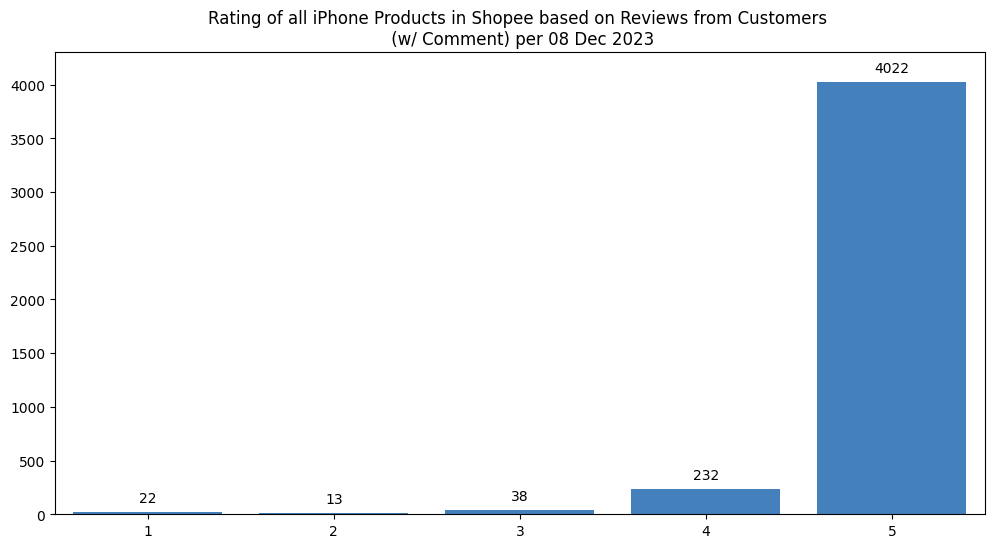

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Rating', data=df, color='#3081D0')
plt.title('Rating of all iPhone Products in Shopee based on Reviews from Customers \n (w/ Comment) per 08 Dec 2023')
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 4300)
plt.show()

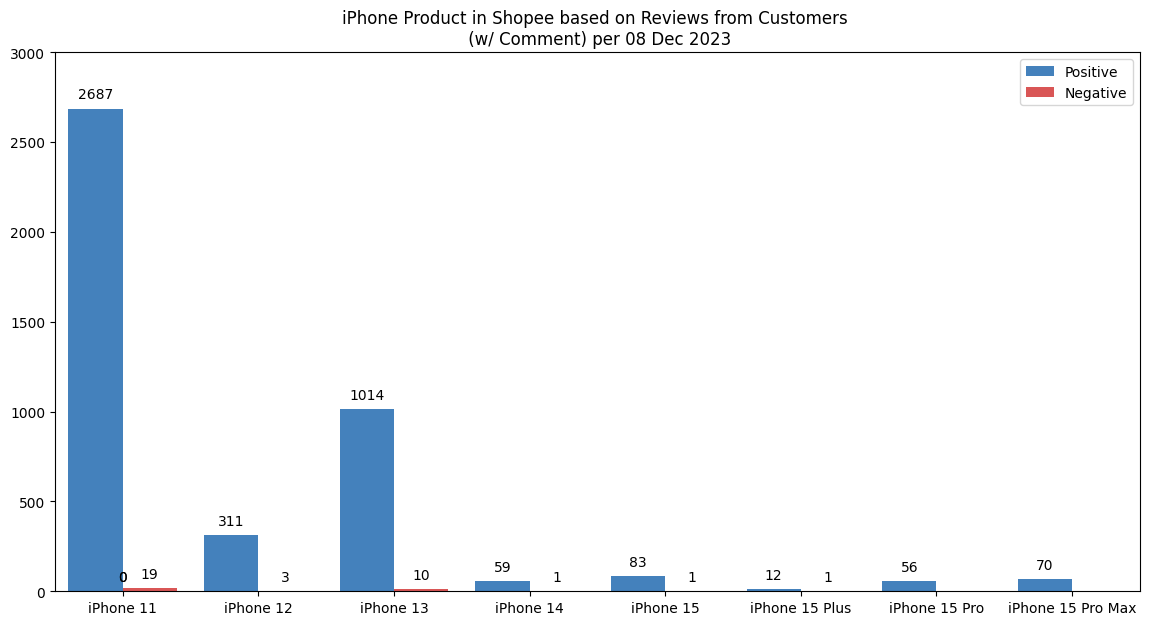

In [13]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='ProductName', hue='Segmentation', data=df, palette={'Positive': '#3081D0', 'Negative': '#EF4040'})
plt.title('iPhone Product in Shopee based on Reviews from Customers \n (w/ Comment) per 08 Dec 2023')
plt.xlabel('')
plt.ylabel('')

ax.legend(title='')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 3000)
plt.show()

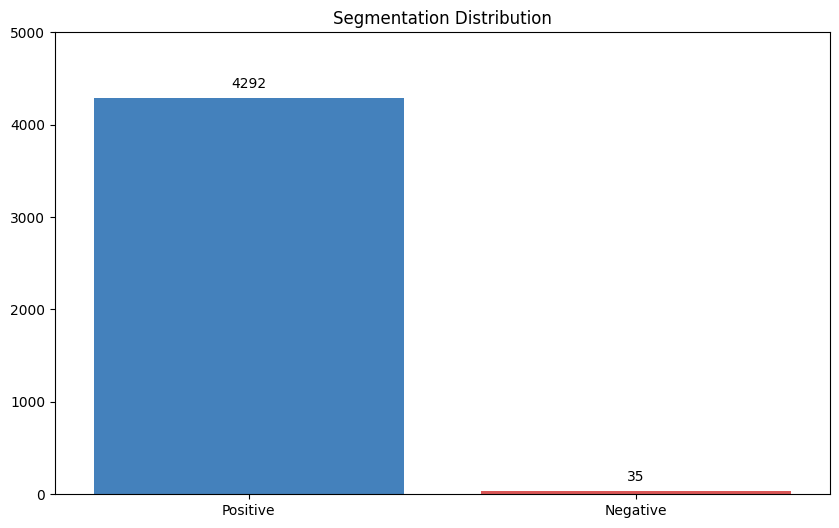

In [14]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Segmentation', data=df, palette={'Positive': '#3081D0', 'Negative': '#EF4040'})
plt.title('Segmentation Distribution')
plt.xlabel('')
plt.ylabel('')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 5000)
plt.show()

In [15]:
col_order = ['Brand', 'ProductName', 'Memory', 'Color', 'Username', 'Rating', 'Comment', 'Segmentation']
df = df[col_order]

df.reset_index(inplace=True)
df.drop(columns='index', inplace=True)

df.head(10)

,Brand,ProductName,Memory,Color,Username,Rating,Comment,Segmentation
0,Apple,iPhone 11,64GB,Black,rudykdg,5,barang mantap mulus super ori ibox semoga awet sihh untuk sekarang smua normal jos kecewa sma pengiriman sih lumayan lama muter di kapuk dc klo brng murah gak pp lama ini harga nya lum...,Positive
1,Apple,iPhone 11,64GB,Black,nasirulka,5,barang sudah diterima dengan baik sesuai dengan deskripsi nya dan original kami sangat senang sekali bisa menerima dengan baik pokoknya very good juga kurir yang baik trimks,Positive
2,Apple,iPhone 11,64GB,Black,redhadwi09,5,terimakasih paket ny sudah sampe kalau soal kualitas gg perlu d review lg ya pasti ny ori,Positive
3,Apple,iPhone 11,64GB,Black,s*****h,5,alhamdulillah akhirnya sampe juga ini paketnya alhamdulillah aman hapenya ori baru masih segel dus nya juga semoga awet terimakasih shopee terimakasih ibox indonesia dan abang kurirnya...,Positive
4,Apple,iPhone 11,64GB,Black,j*****0,5,kecepatan pengirimannya melebihi ekspetasi yang seharusnya sampainya hari sabtu eh kamis pagi sudah ada jne nelpon admin sangat ramah dan responnya cepat terima kasih,Positive
5,Apple,iPhone 11,64GB,Black,m*****i,5,yeeaayy akhirnya sampe juga kemarin sempet deg degan karna beli online tp alhamdulillah barang sampe dgn aman pengemasannya juga cepat barang original garansi resmi ibox tdk ada lecet ...,Positive
6,Apple,iPhone 11,64GB,Black,rifwanhamidi,5,produk original ibox seperti berbelanja di toko ibox langsung pesan hari sabtu siang minggu siangnya handphone sudah diterima original semua aman box rapi dan lengkap beserta paperbag ...,Positive
7,Apple,iPhone 11,64GB,Black,zia.nurfauziah12,5,alhamdulillah udah sampe hp nya pengiriman 4 hari ga terlalu lama lah hp nya bagus tapi belum di coba ibox tolong adain adapter dong mau beli stok nya habis euy gmn atuh kl mau beli ma...,Positive
8,Apple,iPhone 11,64GB,Black,nur.annisalukman20,5,dijamin ori cepat banget pengiriman nya bagus banget hpnya,Positive
9,Apple,iPhone 11,64GB,Black,nisfa.lailiyah,5,kualitas produk sangat baik produk original harga produk sangat baik kecepatan pengiriman sangat baik awalnya mau beli langsung di ibox nya tapi pas liat dapet cashback 300k lebih jadi...,Positive


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327 entries, 0 to 4326
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         4327 non-null   object
 1   ProductName   4327 non-null   object
 2   Memory        4327 non-null   object
 3   Color         4327 non-null   object
 4   Username      4327 non-null   object
 5   Rating        4327 non-null   int32 
 6   Comment       4327 non-null   object
 7   Segmentation  4327 non-null   object
dtypes: int32(1), object(7)
memory usage: 253.7+ KB


## DATA PRE-PROCESSING 2

In [17]:
# Tokenized
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['Tokenized'] = df['Comment'].apply(word_tokenize_wrapper)

In [18]:
# Stop Words
stop_words = set(stopwords.words('indonesian'))
df['TokenizedStopWords'] = df['Tokenized'].apply(lambda x: [word.lower() for word in x if word.lower() not in stop_words])

In [19]:
# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['TokenizedStemming'] = df['TokenizedStopWords'].apply(lambda x: [stemmer.stem(word) for word in x])

In [20]:
def correct_word(word):
    corrected_word = {
        'adain': 'menghadirkan', 'aga': 'cukup', 'agak': 'cukup', 'aja': 'saja', 'alhamdulillahhh': 'alhamdulillah', 'amaan': 'aman', 'amannn': 'aman', 
        'amaaannnn': 'aman', 'amazing': 'luar biasa', 'androit': 'android', 'apa2': 'apa-apa', 'asa': 'ada', 'awet': 'bertahan lama', 'aweeettttt': 'bertahan lama',

        'baguss': 'bagus', 'bagusss': 'bagus', 'bagussss': 'bagus', 'bakal': 'akan', 'bnget': 'sekali', 'banget': 'sekali', 'bangeeet': 'sekali', 'bangettttt': 'sekali',
        'bangetttt': 'sekali', 'bangettt': 'sekali', 'baruuuu': 'baru', 'bbrapa': 'beberapa', 'bgtbgila': 'sekali', 'bebebku': 'kekasih ku', 'bener': 'benar', 
        'bener2': 'benar-benar', 'bener bener': 'benar-benar', 'best': 'terbaik', 'biar': 'agar', 'bgt': 'sekali', 'bgs': 'bagus', 'bgtt': 'sekali', 'bgtttt': 'sekali',
        'bgttt': 'sekali', 'bgtbgt': 'sekali', 'bgtu': 'begitu', 'biar': 'agar', 'bikin': 'membuat', 'blg': 'bilang', 'blm': 'belum', 'blom': 'belum', 'bnyk': 'banyak', 
        'brgnyaaaa': 'barang nya', 'bru': 'baru', 'brng': 'barang', 'but': 'sekali', 'bai': 'baik', 'br': 'baru', 'btw': 'by the way', 'bagossss': 'bagus', 'b': 'biasa',

        'cakep': 'cantik', 'cakeeepp': 'cantik', 'cantikkkkk': 'cantik', 'cantiikk': 'cantik', 'cantikk': 'cantik', 'cari': 'mencari', 'ckep': 'cantik', 'cpt': 'cepat', 
        'cepet': 'cepat', 'cepetttt': 'cepat', 'cm': 'hanya', 'cuakepp': 'cantik', 'cuma': 'hanya', 'cute': 'cantik', 'cust': 'pelanggan', 'cs': 'customer service',
        'cuman': 'hanya',

        'd': 'di', 'dah': 'sudah', 'dapet': 'dapat', 'dpt': 'dapat', 'dg': 'dengan', 'dgn': 'dengan', 'dikit': 'cukup', 'ditunggu2': 'ditunggu-tunggu', 'dipake': 'di pakai',
        'dipeking': 'di packing', 'dll': 'dan lain-lain', 'dlm': 'dalam', 'dlam': 'dalam', 'dlu': 'dulu', 'doang': 'saja', 'dr': 'dari', 'dri': 'dari', 'dtg': 'datang',
        'dtgnya': 'datang nya', 'dsni': 'disini', 'dirmh': 'dirumah', 'disiniii': 'disini', 'dalem': 'dalam',

        'ekspetasi': 'ekspektasi', 'emg': 'memang', 'epsen': 'pesan',

        'fastr': 'cepat', 'fav': 'kesukaan', 'finally': 'akhir nya',

        'ga': 'tidak', 'gak': 'tidak', 'gaada': 'tidak ada', 'gada': 'tidak ada', 'gak': 'tidak', 'gamaurugi': 'tidak mau rugi', 'gampang': 'mudah', 'gaperlu': 'tidak perlu',
        'gapake': 'tidak pakai', 'gara2': 'akibat', 'gatau': 'tidak tahu', 'gausah': 'tidak perlu', 'gede': 'besar', 'gengsi2an': 'gengsi', 'gercep': 'cepat', 'gg': 'tidak',
        'gitu': 'seperti itu', 'gk': 'tidak', 'gmn': 'gimana', 'gt': 'seperti itu', 'gue': 'aku',

        'hengpon': 'handphone', 'hpnya': 'handphone nya', 'hapenya': 'handphone nya', 'hijauny': 'hijau nya', 'hope': 'berharap', 'hp': 'handphone', 'hshshs': 'hahaha', 
        'hri': 'hari', 'hrus': 'harus',

        'ip': 'iphone', 'ip15': 'iphone 15', 'iphonee': 'iphone', 'ituuu': 'itu', 'item': 'hitam', 'ituu': 'itu', 'itung': 'hitung', 'iphoneee': 'iphone', 'impi': 'impian',

        'jwab': 'jawab', 'jd': 'jadi', 'jg': 'juga', 'jga': 'juga', 'jkt': 'jakarta', 'joss': 'mantap', 'junat': 'jumat', 'jugaaa': 'juga', 'jgn': 'jangan',

        'kaget': 'terkejut', 'karna': 'karena', 'kaya': 'kayak', 'kebeli': 'ter beli', 'kerrreeeen': 'keren', 'kluar': 'keluar', 'kl': 'kalau', 'kli': 'kali', 
        'klo': 'kalau', 'klu': 'kalau', 'km': 'kamu', 'kmrn': 'kemarin', 'ksih': 'kasih', 'komplen': 'komplain', 'krn': 'karena', 'krna': 'karena', 'klean': 'kalian',
        'kalo': 'kalau',

        'langgan': 'langganan', 'lagsung': 'langsung', 'luamaa': 'lama', 'lamaaaa': 'lama', 'lg': 'lagi', 'liat': 'melihat', 'lom': 'belum', 'lopp': 'cinta', 
        'lucuuu': 'lucu', 'luv': 'cinta', 'luvvvvv': 'cinta',

        'makasi': 'terima kasih', 'make': 'makai', 'makenya': 'makai nya', 'malem': 'malam', 'mantab': 'mantap', 'mantabb': 'mantap', 'mantafff': 'mantap', 
        'mantappp': 'mantap', 'mantapp': 'mantap', 'mantaaapp': 'mantap', 'mantep': 'mantap', 'manteppppp': 'mantap', 'mantul': 'mantap', 'mantulllita': 'mantap', 
        'maslaah': 'masalah', 'masi': 'masih', 'masya allah': 'masyaallah', 'mayan': 'cukup', 'mentul': 'mantap', 'minat': 'ingin', 'mntulll': 'mantap', 'mo': 'mau', 
        'moga': 'semoga', 'mulu': 'selalu', 'muahaaalll': 'mahal', 'mw': 'mau', 'mending': 'lebih baik', 'mantabbb': 'mantap', 'mastiin': 'memastikan',
        'mesen': 'memesan', 'muas': 'puas', 'mantapppppppppppp': 'mantap', 'min': 'admin',

        'n': 'dan', 'nempel': 'merekat', 'nexday': 'next day', 'nicee': 'mantap', 'nunggu': 'menunggu', 'ngk': 'tidak', 'ngak': 'tidak', 'ngeri': 'takut', 
        'nyampai': 'sampai', 'nyampe': 'sampai', 'nyampeee': 'sampai', 'nyesel': 'menyesal', 'ny': 'nya', 'nyediain': 'menyediakan', 'ngajuin': 'mengajukan',
        'ntappp': 'mantap', 'ni': 'ini', 'ngebet': 'cepat',

        'ok': 'oke', 'okt': 'oktober', 'olshop': 'online shooping', 'ontul': 'mantap', 'ori': 'original', 'originall': 'original',
        
        'packet': 'paket', 'pagi2': 'pagi-pagi', 'pake': 'pakai', 'pantes': 'pantas', 'pantesan': 'pantas', 'pas': 'ketika', 'parah': 'sekali', 'pcar': 'kekasih', 
        'pekirimannya': 'pengiriman nya', 'pesen': 'pesan', 'pengen': 'ingin', 'pengirimannya': 'pengiriman nya', 'penyok2nya': 'penyok-penyok nya', 'pd': 'pada', 
        'pdhl': 'sedangkan', 'pinkk': 'pink', 'pinknya': 'pink nya', 'pinky': 'pink', 'pinkyy': 'pink', 'pp': 'apa-apa', 'pst': 'pasti', 'puass': 'puas', 'pula': 'juga',
        'po': 'pre-order',

        'rada': 'cukup', 'rapi': 'rapih', 'real': 'asli', 'responnya': 'respon nya', 'rima': 'terima', 'rumahh': 'rumah', 'rebutannnn': 'rebutan',

        'sma': 'sama', 'sampe': 'sampai', 'sampeee': 'sampai', 'samsek': 'sama sekali', 'saller': 'toko', 'sdh': 'sudah', 'sedikit': 'cukup', 'sekalihhhh': 'sekali',
        'selamattttttttttttttttttttttttttttt': 'selamat', 'seller': 'toko', 'sellerrrr': 'toko', 'sekamat': 'selamat', 'smua': 'semua', 'segemes': 'se cantik', 
        'seneng': 'senang', 'seris': 'series', 'skrng': 'sekarang', 'sm': 'sama', 'smga': 'semoga', 'smpai': 'sampai', 'sempet': 'sempat', 'smp': 'sampai', 'so': 'bisa', 
        'soft': 'lembut', 'sukaaa': 'suka', 'stelah': 'setelah', 'stlah': 'setelah', 'store': 'toko', 'suamii': 'suami', 'sudahh': 'sudah', 'swmoga': 'semoga', 'syp': 'siapa',
        'smpe': 'sampai', 'sen': 'memesan', 'spy': 'agar',

        'tak': 'tidak', 'takuttt': 'takut', 'tapi': 'tetapi', 'taro': 'taruh', 'tebel': 'tebal', 'terimakasih': 'terima kasih', 'terimaaaa kasihhh': 'terima kasih',
        'terimaaaa kasihhh': 'terima kasih', 'tdk': 'tidak', 'tgl': 'tanggal', 'thanks': 'terima kasih', 'thankyou': 'terima kasih', 'thx': 'terima kasih', 
        'thx u': 'terima kasih', 'tmn': 'teman', 'tp': 'tetapi', 'tpi': 'tetapi', 'trimks': 'terima kasih', 'trouble': 'masalah', 'terus': 'kemudian', 'trus': 'kemudian',
        'ttp': 'tetap', 'tq': 'terima kasih', 'terbaikkkkkk': 'terbaik',

        'uda': 'sudah', 'udh': 'sudah', 'udah': 'sudah', 'utk': 'untuk',

        'was was': 'takut', 'wlupun': 'walaupun', 'wangg': 'uang', 'worry': 'takut',
        
        'yg': 'yang',

        '2x': '2 kali', '20okt': '20 oktober', '27 oct': '27 oktober', '3tahun': '3 tahun', '4tahun': '4 tahun'
        }

    return corrected_word.get(word, word)

df['TokenizedStemming'] = df['TokenizedStemming'].apply(lambda x: [correct_word(word) for word in x])

In [21]:
# Joining again
df['CommentClean'] = df['TokenizedStemming'].apply(lambda x: ' '.join(x))

## WORD CLOUD

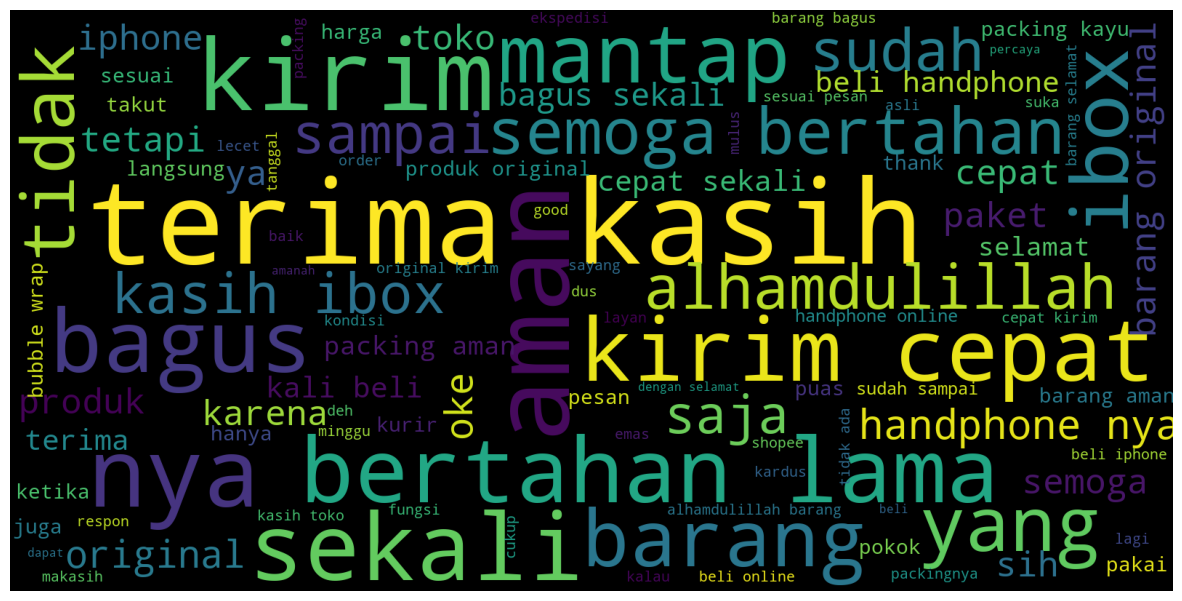

In [22]:
positive_comments = df[df['Segmentation'] == 'Positive']['CommentClean']
positive_text = ' '.join(i for i in positive_comments)

def generate_wordcloud(data):
    wordcloud = WordCloud(
        max_words=100,
        max_font_size=40,
        scale=4).generate(data)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

generate_wordcloud(positive_text)

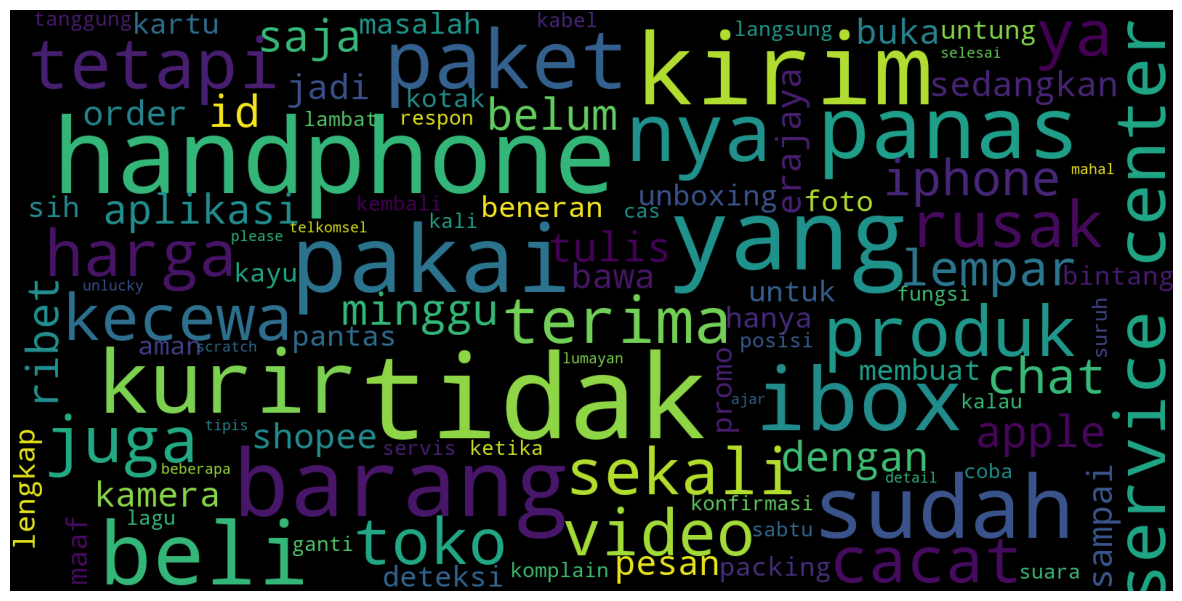

In [23]:
negative_comments = df[df['Segmentation'] == 'Negative']['CommentClean']
negative_text = ' '.join(i for i in negative_comments)

def generate_wordcloud(data):
    wordcloud = WordCloud(
        max_words=100,
        max_font_size=40,
        scale=4).generate(data)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

generate_wordcloud(negative_text)

## LABEL ENCODING

In [24]:
label_encoder = LabelEncoder()
  
df['Segmentation'] = label_encoder.fit_transform(df['Segmentation'])

def convert_to_int(df, column_name):
    df[column_name] = df[column_name].astype('int64')

convert_to_int(df, 'Rating')
convert_to_int(df, 'Segmentation')

## TRAIN TEST SPLIT

In [25]:
X = df['CommentClean']
y = df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## VECTORIZER

In [26]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## HANDLING IMBALANCED

In [27]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)
X_train_strat, X_val_strat, y_train_strat, y_val_strat = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42)

## MODEL TRAINING

In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train_strat, y_train_strat)

y_pred_train = nb_model.predict(X_train_strat)
y_pred_probabilities_train = nb_model.predict_proba(X_train_strat)

y_pred_val = nb_model.predict(X_val_strat)
y_pred_probabilities_val = nb_model.predict_proba(X_val_strat)

class_report_train = classification_report(y_train_strat, y_pred_train)
class_report_val = classification_report(y_val_strat, y_pred_val)

metrics_dict = {
    'Metric': ['Accuracy', 'Recall', 'F1 Score', 'ROC AUC', 'Log Loss'],
    'Train Set': [
        accuracy_score(y_train_strat, y_pred_train),
        recall_score(y_train_strat, y_pred_train),
        f1_score(y_train_strat, y_pred_train),
        roc_auc_score(y_train_strat, y_pred_probabilities_train[:, 1]),
        log_loss(y_train_strat, y_pred_probabilities_train)
    ],
    'Validation Set': [
        accuracy_score(y_val_strat, y_pred_val),
        recall_score(y_val_strat, y_pred_val),
        f1_score(y_val_strat, y_pred_val),
        roc_auc_score(y_val_strat, y_pred_probabilities_val[:, 1]),
        log_loss(y_val_strat, y_pred_probabilities_val)
    ]
}

print("\nClassification Report - Train Set:\n", class_report_train)
print("\nClassification Report - Validation Set:\n", class_report_val)
print('-'*90)
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df.to_string(index=False))


Classification Report - Train Set:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2750
           1       1.00      0.98      0.99      2750

    accuracy                           0.99      5500
   macro avg       0.99      0.99      0.99      5500
weighted avg       0.99      0.99      0.99      5500


Classification Report - Validation Set:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       688
           1       1.00      0.98      0.99       688

    accuracy                           0.99      1376
   macro avg       0.99      0.99      0.99      1376
weighted avg       0.99      0.99      0.99      1376

------------------------------------------------------------------------------------------
  Metric  Train Set  Validation Set
Accuracy      0.989           0.991
  Recall      0.979           0.981
F1 Score      0.989           0.990
 ROC AUC      1.000           1.

## MODEL EVALUATION

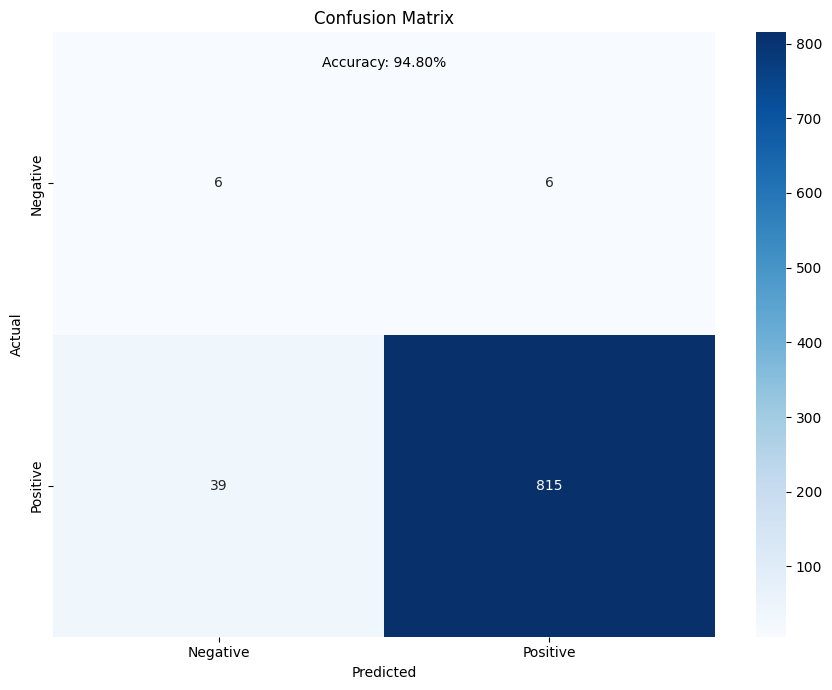

In [32]:
y_pred_test = nb_model.predict(X_test_tfidf)
y_pred_probabilities_test = nb_model.predict_proba(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_test)
confusion_mat_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(9, 7))

sns.heatmap(confusion_mat_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.text(0.5, 0.95, f'Accuracy: {accuracy:.2%}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

## PREDICTION TEST

In [33]:
new_data = df.sample(n=10, random_state=42)
X_new = tfidf_vectorizer.transform(new_data['CommentClean'])
y_pred_new = nb_model.predict(X_new)
y_pred_probabilities_new = nb_model.predict_proba(X_new)

new_data['Prediction'] = y_pred_new
new_data['Probability'] = y_pred_probabilities_new[:, 1]

new_data[['Username', 'Rating', 'CommentClean', 'Segmentation', 'Prediction', 'Probability']]

,Username,Rating,CommentClean,Segmentation,Prediction,Probability
2420,m*****_,4,alhamdulillah sudah barang oke hanya packing nya takut karena tipis,1,1,0.899
1450,z*****h,5,sooo pretty kirim cepat kirim kurir yang makasih,1,1,0.916
2092,rahmathidayat130401,5,makasih admin barang luncur aman kirim cepat sekali terima kasih admin barang oke,1,1,0.998
3920,p*****a,5,kirim cepat produk lengkap kondisi bagus,1,1,0.718
2846,r*****a,5,my first iphone in life degdegan ya beli iphone kali beli online jam cek status shipping nya sudah wkwk alhamdulillah rem ya packing nya apa dalam oke thank you ibox,1,1,0.994
949,aldoemmanuel20,5,packaging bagus kasih kayu barang mulus sehat al wafiat terima kasih,1,1,0.992
3196,s*****w,5,cantik sekali iphone pink,1,1,0.983
157,n*****y,5,handphone impian estimasi 2 admin ramah walopun handphone nya panas aktif sekali all good smoga bertahan lama terima kasih,1,1,0.997
1697,yunia_78,5,bagus,1,1,0.912
856,w*****1,5,terbaik alhamdulillah barang cepat,1,1,0.994
